<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_BIRCHvsBERT_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: BIRCH Vs BERT Embedding

###AUTHOR: Sheida Talei

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [2]:
import transformers
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:

from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
# from transformers import glue_convert_examples_to_features, InputExample
from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# from kneed import KneeLocator
from sklearn import metrics

In [4]:
from sklearn.cluster import Birch

In [5]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [6]:
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
Y_train= X_and_Y.Label
X_train = X_and_Y.text

In [7]:
model = SentenceTransformer('bert-base-multilingual-cased')

Exception when trying to download https://sbert.net/models/bert-base-multilingual-cased.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/bert-base-multilingual-cased.zip not found. Try to create it from scratch
Try to create Transformer Model bert-base-multilingual-cased with mean pooling


In [8]:
#Source: https://github.com/UKPLab/sentence-transformers
sentence_embeddings = model.encode(X_train)

100
500
1000
2000
3000
4000
5000
6000
8000
10000


Text(0, 0.5, 'Silhouette_score')

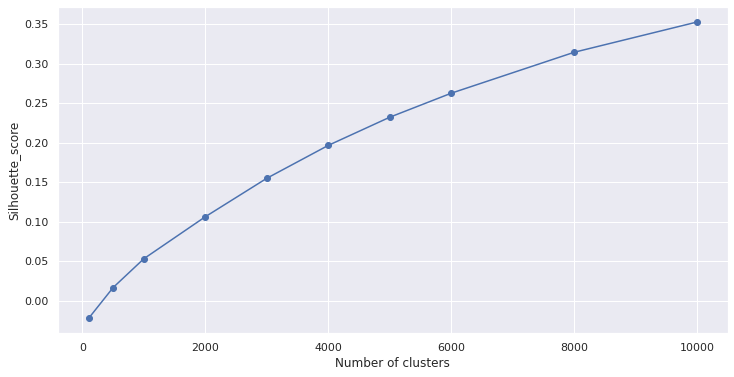

In [9]:
SSE = []
clusterList = [100,500,1000,2000,3000,4000,5000,6000,8000,10000]
for cluster in clusterList:
    brc = Birch(branching_factor=50, n_clusters=cluster, threshold=1, compute_labels=True)
    brc.fit(sentence_embeddings)
    labels = brc.labels_
    SSE.append(metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean'))
    # clusterList.append(cluster)
    print (cluster)
    # cluster = cluster + 10

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')

In [ ]:
# converting the results into a dataframe and plotting them
# clusterList = [4000,5000,6000,7000,8000,9000,10000]
# frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette_score')